<a href="https://colab.research.google.com/github/NorthernPeach/AI_gamers/blob/main/%D0%A1%D0%9A%D0%A4%D0%9E3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Основа для модели нейронной сети
from tensorflow.keras.models import Model 


# слои нейронной сети
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# Стандартные слои keras
from tensorflow.keras.layers import Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization 

# Оптимизатор Adam
from tensorflow.keras.optimizers import Adam 

# Дополнительные утилиты keras
from tensorflow.keras import utils 

# Инструменты для построения графиков
import matplotlib.pyplot as plt 

# Инструменты для работы с изображениями
from tensorflow.keras.preprocessing import image 

# для разделения выборок
from sklearn.model_selection import train_test_split

# Инструменты для работы с массивами
import numpy as np 

# создание последовательной модели
from tensorflow.keras.models import Sequential

# Системные инструменты
import time, random, gdown, os

import pandas as pd

# импорт tensorflow
import tensorflow as tf

# Для работы с файлами
import gc

# методы для отрисовки изображений
from PIL import Image, ImageEnhance 

# Дополнительные инструменты визуализации
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
# загрузка тренировочного датасета
gdown.download('https://ai-data.obs.ru-moscow-1.hc.sbercloud.ru/%D0%98%D0%98_%D0%B2_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA%D0%B0%D1%85_%D0%B3%D1%80%D0%B5%D0%BD%D0%BB%D0%B0%D0%BD%D0%B4%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D0%BA%D0%B8%D1%82%D0%B0.zip', None, quiet=True)
!unzip -q "%D0%98%D0%98_%D0%B2_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA%D0%B0%D1%85_%D0%B3%D1%80%D0%B5%D0%BD%D0%BB%D0%B0%D0%BD%D0%B4%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D0%BA%D0%B8%D1%82%D0%B0.zip" -d /content/ # подгрузим базу в ноутбук в директорию 'content/'

In [ ]:
import shutil
import os
os.chdir(r"/content/Whale ReId 2_mm")
for i in range(1, 103):
  for dirpath, dirnames, filenames in os.walk(r"/content/Whale ReId 2_mm" + f"/{i}"):
    for dirname in dirnames:

      for dirpath2, dirnames2, filenames2 in os.walk(f"{os.path.join(dirpath, dirname)}"):
        j = 0
        for filename in filenames2:
          if j <= 10:
            if filename[-3:] != 'png':
              shutil.copyfile(f"{os.path.join(dirpath2, filename)}", r"/content/Whale ReId 2_mm" + f"/{i}" + f"/{filename}")
              os.remove(f"{os.path.join(dirpath2, filename)}")
              #os.replace(f"{os.path.join(dirpath2, filename)}", r"/content/Whale ReId 2_mm" + f"/{i}" + f"/{filename}")
              j +=1
          if j > 11: 
            os.remove(f"{os.path.join(dirpath2, filename)}")
for i in range(1, 103):
  for dirpath, dirnames, filenames in os.walk(r"/content/Whale ReId 2_mm" + f"/{i}"):
    for dirname in dirnames:
      for dirpath2, dirnames2, filenames2 in os.walk(f"{os.path.join(dirpath, dirname)}"):
        for filename in filenames2:
              os.remove(f"{os.path.join(dirpath2, filename)}")
for i in range(1, 103):
  for dirpath, dirnames, filenames in os.walk(r"/content/Whale ReId 2_mm" + f"/{i}"):
    for dirname in dirnames:
      os.rmdir(f"{os.path.join(dirpath, dirname)}")

In [ ]:
import os
os.chdir(r"/content/Whale ReId 2_mm")
for i in range(1, 103):
  for dirpath, dirnames, filenames in os.walk(r"/content/Whale ReId 2_mm" + f"/{i}"):
    for filename in filenames:
      os.replace(f"{os.path.join(dirpath, filename)}", r"/content/Whale ReId 2_mm" + f"/{i}" + f"/{filename}")
for i in range(1, 103):
  for dirpath, dirnames, filenames in os.walk(r"/content/Whale ReId 2_mm" + f"/{i}"):
    for dirname in dirnames:
      os.rmdir(f"{os.path.join(dirpath, dirname)}")


In [ ]:
os.chdir(r"/content/Whale ReId 2_mm")
for i in range(1, 103):
  for dirpath, dirnames, filenames in os.walk(r"/content/Whale ReId 2_mm" + f"/{i}"):
    for filename in filenames:
      if filename[-3:] == 'png':
        os.remove(f"{os.path.join(dirpath, filename)}")

In [ ]:
import os
import shutil 

os.mkdir('/content/NewWhales')
for i in range(1, 35):
  os.mkdir('/content/NewWhales' + f'/{i}')
for i in range(1, 35):
  for dirpath, dirnames, filenames in os.walk(r"/content/Whale ReId 2_mm" + f"/{i}"):
    for filename in filenames:
        shutil.copyfile(f"{os.path.join(dirpath, filename)}", f"/content/NewWhales/{i}/" + filename)

In [ ]:
# создание списков файлов и меток класса

num_classes = 102  # количество классов

listID = []      # список путей до файлов изображений
labels = []      # список классов (по номеру папки), соответствующий файлам

#path = '/content/NewWhales/' # Папка с папками картинок, рассортированных по категориям
path = '/content/Whale ReId 2_mm/' # Папка с папками картинок, рассортированных по категориям

for cls in range(num_classes): # проходимся по классам (0, 1, 2)
    class_path = os.listdir(path)[cls] # получаем список с именами подпапок
    car_path = path + class_path # Формируем путь к выборке
    list_class = [] # создаем временный список куда соберем все пути к файлам класса
    cars_class = os.listdir(car_path) # получаем список с именами файлов машин класса
    #print('Размер класса ' + class_path + ' составляет', len(cars_class), ' машин')

    for filename in cars_class: # берем по очереди имена файлов класса
        list_class.append(class_path +'/' + filename) # собираем временный список с путями к файлам класса
    listID.extend(list_class) # добавляем в общий список
    # создаем временный список длины list_class и заполненный номером класса
    label_class = [cls for i in range(len(list_class))]
    #print('Список меток класса', label_class)
    
    labels.extend(label_class) # добавляем в общий списк меток

print('Общий размер базы для обучения:', len(listID))

Общий размер базы для обучения: 4798


In [ ]:
# Папка с папками картинок, рассортированных по категориям
#IMAGE_PATH = '/content/NewWhales/'
IMAGE_PATH = '/content/Whale ReId 2_mm/'
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 102, метки классов: ['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [ ]:
for cls in CLASS_LIST:
    print(cls, ':', os.listdir(f'{IMAGE_PATH}{cls}/'))

1 : ['crop1_DJI_0481_288.jpg', 'crop2_DJI_0002_68.jpg', 'crop2_DJI_0481_651.jpg', 'crop1_DJI_0481_151.jpg', 'crop1_DJI_0002_45.jpg', 'crop4_DJI_0002_83.jpg', 'crop_DJI_0001_30.jpg', 'crop3_DJI_0481_501.jpg', 'crop3_DJI_0481_288.jpg', 'crop_DJI_0001_15.jpg', 'crop3_DJI_0481_376.jpg', 'crop2_DJI_0481_513.jpg', 'crop3_DJI_0481_663.jpg', 'crop3_DJI_0002_8.jpg', 'crop4_DJI_0002_225.jpg', 'crop2_DJI_0481_251.jpg', 'crop2_DJI_0481_776.jpg', 'crop_DJI_0001_353.jpg', 'crop_DJI_0001_720.jpg', 'crop1_DJI_0481_251.jpg', 'crop1_DJI_0481_138.jpg', 'crop2_DJI_0002_90.jpg', 'crop_DJI_0001_840.jpg', 'crop_DJI_0001_652.jpg', 'crop_DJI_0001_645.jpg', 'crop2_DJI_0481_438.jpg', 'crop_DJI_0001_8.jpg', 'crop1_DJI_0481_226.jpg', 'crop2_DJI_0481_751.jpg', 'crop3_DJI_0002_30.jpg', 'crop3_DJI_0481_151.jpg', 'crop4_DJI_0002_120.jpg', 'crop_DJI_0001_690.jpg', 'crop3_DJI_0481_438.jpg', 'crop_DJI_0001_562.jpg', 'crop2_DJI_0002_45.jpg', 'crop_DJI_0001_188.jpg', 'crop4_DJI_0002_53.jpg', 'crop2_DJI_0002_105.jpg', 'crop

In [ ]:
classes = []
values = []
for i in range(1,34):
    whales_class = os.listdir("/content/NewWhales" + f"/{i}")              
    classes.append(i)
    values.append(len(whales_class))
    print('размер класса '+ str(i) + ' составляет', 
          len(whales_class), ' китов')

df = pd.DataFrame(classes, columns=['Класс'])
df['Количество'] = values

размер класса 1 составляет 88  китов
размер класса 2 составляет 55  китов
размер класса 3 составляет 94  китов
размер класса 4 составляет 84  китов
размер класса 5 составляет 38  китов
размер класса 6 составляет 33  китов
размер класса 7 составляет 11  китов
размер класса 8 составляет 33  китов
размер класса 9 составляет 33  китов
размер класса 10 составляет 44  китов
размер класса 11 составляет 33  китов
размер класса 12 составляет 33  китов
размер класса 13 составляет 132  китов
размер класса 14 составляет 33  китов
размер класса 15 составляет 44  китов
размер класса 16 составляет 11  китов
размер класса 17 составляет 22  китов
размер класса 18 составляет 174  китов
размер класса 19 составляет 22  китов
размер класса 20 составляет 41  китов
размер класса 21 составляет 77  китов
размер класса 22 составляет 55  китов
размер класса 23 составляет 22  китов
размер класса 24 составляет 11  китов
размер класса 25 составляет 55  китов
размер класса 26 составляет 74  китов
размер класса 27 со

In [ ]:
classes = []
values = []
for i in range(1,34):
    whales_class = os.listdir("/content/NewWhales" + f"/{i}")              
    classes.append(i)
    values.append(len(whales_class))
    print('размер класса '+ str(i) + ' составляет', 
          len(whales_class), ' китов')

df = pd.DataFrame(classes, columns=['Класс'])
df['Количество'] = values

размер класса 1 составляет 88  китов
размер класса 2 составляет 55  китов
размер класса 3 составляет 94  китов
размер класса 4 составляет 84  китов
размер класса 5 составляет 38  китов
размер класса 6 составляет 33  китов
размер класса 7 составляет 11  китов
размер класса 8 составляет 33  китов
размер класса 9 составляет 33  китов
размер класса 10 составляет 44  китов
размер класса 11 составляет 33  китов
размер класса 12 составляет 33  китов
размер класса 13 составляет 132  китов
размер класса 14 составляет 33  китов
размер класса 15 составляет 44  китов
размер класса 16 составляет 11  китов
размер класса 17 составляет 22  китов
размер класса 18 составляет 174  китов
размер класса 19 составляет 22  китов
размер класса 20 составляет 41  китов
размер класса 21 составляет 77  китов
размер класса 22 составляет 55  китов
размер класса 23 составляет 22  китов
размер класса 24 составляет 11  китов
размер класса 25 составляет 55  китов
размер класса 26 составляет 78  китов
размер класса 27 со

In [ ]:
classes = []
values = []
for i in range(1,102):
    whales_class = os.listdir("/content/Whale ReId 2_mm" + f"/{i}")              
    classes.append(i)
    values.append(len(whales_class))
    print('размер класса '+ str(i) + ' составляет', 
          len(whales_class), ' китов')

df = pd.DataFrame(classes, columns=['Класс'])
df['Количество'] = values

размер класса 1 составляет 88  китов
размер класса 2 составляет 55  китов
размер класса 3 составляет 94  китов
размер класса 4 составляет 84  китов
размер класса 5 составляет 38  китов
размер класса 6 составляет 33  китов
размер класса 7 составляет 11  китов
размер класса 8 составляет 33  китов
размер класса 9 составляет 33  китов
размер класса 10 составляет 44  китов
размер класса 11 составляет 33  китов
размер класса 12 составляет 33  китов
размер класса 13 составляет 132  китов
размер класса 14 составляет 33  китов
размер класса 15 составляет 44  китов
размер класса 16 составляет 11  китов
размер класса 17 составляет 22  китов
размер класса 18 составляет 174  китов
размер класса 19 составляет 22  китов
размер класса 20 составляет 41  китов
размер класса 21 составляет 77  китов
размер класса 22 составляет 55  китов
размер класса 23 составляет 22  китов
размер класса 24 составляет 11  китов
размер класса 25 составляет 55  китов
размер класса 26 составляет 74  китов
размер класса 27 со

In [ ]:
classes = []
values = []
for i in range(1,102):
    whales_class = os.listdir("/content/Whale ReId 2_mm" + f"/{i}")              
    classes.append(i)
    values.append(len(whales_class))
    print('размер класса '+ str(i) + ' составляет', 
          len(whales_class), ' китов')

df = pd.DataFrame(classes, columns=['Класс'])
df['Количество'] = values

размер класса 1 составляет 388  китов
размер класса 2 составляет 157  китов
размер класса 3 составляет 268  китов
размер класса 4 составляет 1007  китов
размер класса 5 составляет 54  китов
размер класса 6 составляет 38  китов
размер класса 7 составляет 100  китов
размер класса 8 составляет 594  китов
размер класса 9 составляет 551  китов
размер класса 10 составляет 328  китов
размер класса 11 составляет 651  китов
размер класса 12 составляет 1308  китов
размер класса 13 составляет 1186  китов
размер класса 14 составляет 359  китов
размер класса 15 составляет 601  китов
размер класса 16 составляет 188  китов
размер класса 17 составляет 715  китов
размер класса 18 составляет 1263  китов
размер класса 19 составляет 140  китов
размер класса 20 составляет 119  китов
размер класса 21 составляет 481  китов
размер класса 22 составляет 1040  китов
размер класса 23 составляет 106  китов
размер класса 24 составляет 308  китов
размер класса 25 составляет 589  китов
размер класса 26 составляет 254

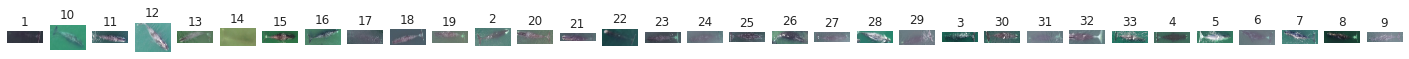

In [ ]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(25, 5))

# Для всех номеров классов:  for i in range(CLASS_COUNT):
for i in range(CLASS_COUNT):
    # Формирование пути к папке содержимого класса
    car_path = f'{IMAGE_PATH}{CLASS_LIST[i]}/' 
    # Выбор случайного фото из i-го класса
    img_path = car_path + random.choice(os.listdir(car_path)) 
    # Отображение фотографии (подробнее будет объяснено далее)
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))  
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

## Этот блок **пропустить**

In [ ]:
# функция аугментации

def augment_images(img, # -------------- изображение для аугментации
                   max_ang = 8, # ------ максимально возможный угол поворота
                   m_cx = 10, # -------- максимальное смещение центра по оси х
                   m_cy = 10, # -------- максимальное смещение центра по оси y
                   crop_w = 0.15, # ---- максимальная подрезка по ширине
                   crop_h = 0.15, # ---- максимальная подрезка по высоте
                   levcont = 0.5, # ---- параметр для коррекции контрастности
                   levbght = 0.5): # --- параметр для коррекции яркости

    def random_rote(x = img, max_ang = max_ang, m_cx = m_cx, m_cy = m_cy):
        global ang # делаем размер поворота доступным за функцией
        ang = np.random.randint(-max_ang, max_ang)  
        cx = np.random.randint(m_cx)
        cy = np.random.randint(m_cy)
        return  x.rotate(ang, center = (cx,cy))

    def random_crop(x = img, crop_w = crop_w, crop_h = crop_h):
        width, height = x.size # получаем размер входящей картинки

        # получаем случайные множители от до cut_w , cut_h соответственно
        kw = np.random.random()*crop_w
        kh = np.random.random()*crop_h 
        
        # вычисляем случайные значения left, upper, right, lower
        left = int(min(width*kw, width*0.2))
        upper = int(min(height*kh, height*0.2)) 
        right = np.random.randint(max(left, width*0.8), width)
        lower =  np.random.randint(max(upper,height*0.8), height)

        return x.crop((left, upper, right, lower))

    def trans_img(x = img):
        return x.transpose(Image.FLIP_LEFT_RIGHT)
    
    def random_contrast(x = img, levcont = levcont):
        enh = ImageEnhance.Contrast(x)
        factor = np.random.uniform(levcont, 2-levcont)
        return enh.enhance(factor)

    def random_bright(x = img, levbght = levbght):
        enh = ImageEnhance.Brightness(x)
        factor = np.random.uniform(levbght, 2-levbght)
        return enh.enhance(factor)
        
    # фунция, которая ничего не делает с изображением, оставляя как есть
    def img_img(x = img):
        return x
    
    # создаем список модификаций
    modificate = [random_rote, 
                  random_crop,
                  trans_img, 
                  random_contrast,
                  random_bright, 
                  img_img]

    # определяем количество модификаций из размера списка модификаций
    qty_mod = np.random.randint(1, len(modificate))

    # создаем список длины, равной кол-ву модификаций
    mod = list(range(len(modificate)))

    # перемешиваем
    np.random.shuffle(mod)

    # выбираем случайно индексы в количестве qty_mod
    lst_mod = random.sample(mod,qty_mod)

    # применяем модификации по индексам из lst_mod      
    for idx in lst_mod:  
        img = modificate[idx](img)

    # если был поворот - 0, то обрезаем края где черные углы о  поворота
    if 0 in lst_mod:
        # получаем ширину и высоту изображения
        width, height =  img.size       

        # высчитываем размер черного поля через угол, переведя в радианы
        crop_w = int(abs(height*np.sin(np.deg2rad(ang))))
        crop_h = int(abs(width*np.sin(np.deg2rad(ang))))

        # подрезаем картинку по краем, чтобы убрать черные поля от поворота
        img = img.crop((crop_w, crop_h, width-crop_w, height-crop_h))

    return img

In [ ]:
# функция создания батчей из списков изображений и их меток

def data_batches(data, # --------- данные для обработки, в виде [listID, labels]
                 batch_size, # --- размер батча 
                 size_step # ----- шаг смещения
                 ):

    steps = len(data[0])//size_step # кол-во батчей в списке при параметрах выше

    set_batch_ID = [] # пустой список для батча изображений
    set_batch_labels = [] # пустой список для батча меток, соответствующих изображениям

    for step in range(steps):
        
        batch_ID = data[0][step*size_step:step*size_step + batch_size] # вырезаем элементы с нужным индексом
        # 1-я итерация: steps=0, batch_ID = listID[0*10:0*10+32]=listID[0:32]
        # 2-я итерация: steps=1, batch_ID = listID[1*10:1*10+32]=listID[10:42] 
        # ...
        set_batch_ID.append(batch_ID) # присоединяем их к списку

        batch_lbl = data[1][step*size_step:step*size_step + batch_size]
        set_batch_labels.append(batch_lbl)

    return [set_batch_ID, set_batch_labels] 

In [ ]:
# функция, которая подает батчи в нейросеть

def batch_generator(step, # ---------- шаг обучения (появится как номер итерации в цикле, в обучении ниже)
                    path, #  --------- путь к папкам класса
                    set_batches, # --- список из списков батчей имен папка+файл и списка меток
                    img_width, # ----- единая ширина картинки на выходе
                    img_height # ----- единая высота картинки на выходе 
                    ):

    set_images = [] # общий список для сбора массивов данных
    
    for filename in set_batches[0][step]: # перебираем изображения, обращаясь к ним по индексу, т.к. set_batches = [[],[]]
        
        img = Image.open(path + filename) # помещаем изображение в переменную
        img = augment_images(img) # аугментируем его
        img = img.resize((img_width, img_height)) # приводим к заданному размеру 
        img_np = np.array(img) # переводим в нампи-массив
        set_images.append(img_np) # добавляем массив в список
    
    set_images = np.array(set_images)/255 # переводим общий список в массив, нормируем

    label_class = set_batches[1][step] # помещаем список меток в переменную, обращаясь к ним по индексу
    label_class = np.array(label_class) # переводим список меток в нампи-массив

    out = (set_images, label_class) # собираем в список данных на шаге

    return out

In [ ]:
# функция для отображения этапов обучения

def print_log(current, # номер текущего батча
              amount, # число всех батчей 
              params # словарь дополнительных параметров для вывода 
              ):
  
  bar_len = 20 # Длина бара 
  percent = int(current * bar_len / amount) # Процент выполненной работы
  progressbar = ''

  for i in range(bar_len): #Проходим по всем элементам прогрессбара и добавляем символы в соответсвии с прогресом 
    if(i < percent):
      progressbar += '='
    elif(i == percent):
      progressbar += '>'
    else:
      progressbar += '-'

  # Добавялем в финальное сообщение символ переноса каретки консоли на начальную строку, добавляпем информацию о номере батча
  # количестве всех батчей, прогрессбар
  # Символ переноса коретки \r добавляется для того, чтобы каждый новый батч перезаписывать вывод. Таким образом вывод не будет засоряться повторяющейся информацией
  message = "\r" + str(current) + '/' + str(amount) + ' [' + progressbar + ']  ' 
 
  # Добавляем дополнительные параметры в вывод
  for key in params:
    message += key + str(params[key]) + '. '
  
  print(message, end='')

In [ ]:
#получаем перемешанные списки для train и test

train_listID, test_listID, train_labels, test_labels = train_test_split(listID, 
                                                                        labels,
                                                                        test_size = 0.2, 
                                                                        random_state=42)
# собираем в списки 

train_data = [train_listID, train_labels]
test_data = [test_listID, test_labels]

In [ ]:
# Разбиение набора данных (listID и labels) на батчи

size_step = 32 # задаем размер шага 
batch_size = 32 # задаем размер батча

set_batches_train = data_batches(train_data, batch_size, size_step) # батч обучающих наборов
set_batches_test = data_batches(test_data, batch_size, size_step) # батч тестовых наборов

In [ ]:
# задаем желаемый размер изображениям

img_width = 243 # Ширина 
img_height = 162 # Высота 
chanels = 3 # Количество каналов  

input_shape = (img_height, img_width, chanels)

In [ ]:
# функция для создания модели

def our_model(input_shape):
    
    model = Sequential()

    # 1
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3))) # Укажем pool_size=(3, 3)    81*54
    model.add(Dropout(0.3))

    # 2
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))                             # 27*18
    model.add(Dropout(0.3))

    # 3
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))                             # 9*6
    model.add(Dropout(0.3))

    # 4
   # model.add(BatchNormalization())
   # model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
   # model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
   # model.add(MaxPooling2D(pool_size=(3, 3)))                             # 3*2
   # model.add(Dropout(0.3))

    # 5
   # model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
   # model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
   # model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(2048, activation='elu'))
    model.add(Dense(4096, activation='elu'))
    model.add(Dense(num_classes, activation='softmax')) # Выходной полносвязный слой с количеством нейронов равным количесту классов

    return model

In [ ]:
model = our_model(input_shape)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('model_.h5')

In [ ]:
epochs = 5 #  количество эпох
path = '/content/NewWhales/' # путь до папок с изображениями

# создаем пустые списки для сбора усредненных данных от шагов в конце эпохи
loss_train_lrn =[]
acc_train_lrn =[]
loss_test_lrn =[]
acc_test_lrn =[]

# определяем количество шагов на 
steps_train = len(set_batches_train[0])
steps_test = len(set_batches_test[0])

for epoch in range(epochs): # запускаем цикл обучения по эпохам
    
    int_start = time.time() #записываем начальное время эпохи
    
    # создаем пустые списки для сбора данных по шагам внутри эпохи
    loss_train = []    
    acc_train = []
    loss_test = []
    acc_test = []

    print(f'Эпоха {epoch+1}/{epochs}') # Выводим текущую эпоху и общее число эпох

    # запускаем цикл обучения по шагам внутри эпохи
    for step in range(steps_train): # получаем батч данных для обучения
        
        Train_step_data = batch_generator(step, 
                                          path, 
                                          set_batches_train, 
                                          img_width, 
                                          img_height)
        
        # пропускаем обучающий батч данных, получаем ошибку и точность как список
        result_train_step = model.train_on_batch(Train_step_data[0], 
                                                 Train_step_data[1])
        
        loss_train.append(result_train_step[0]) # собираем ошибку на шаге
        acc_train.append(result_train_step[1]) # собираем точность на шаге

        # Задаем параметры в словаре, которые будем выводить 
        params = {'Время(сек.) на эпохе: ': round(time.time() - int_start,2), #Считаем время обучения на данной эпохе и добавляем в словарь
                  'loss: ': round(result_train_step[0], 4), #добавляем в словарь ошибку на шаге обучения
                  'acc: ': round(result_train_step[1], 4)} #Добавляем точность на шаге обучения

        # печатаем отдельной функцией текущие данные на шаге обучения
        print_log(step, steps_train, params) #Выводим всю нужную информацию 
        
        # запоминаем последний шаг обучения на эпохе
        # и добавляем единицу для корректности отображения
        endstep = step+1 
    
      
    # собираем усредненные ошибку и точность на обучении от всех шагов на эпохе
    loss_train_lrn.append(np.mean(loss_train))
    acc_train_lrn.append(np.mean(acc_train))

    # запоминаем и округляем последнее записанное усредненное значение для отображения по ходу обучения
    params['loss: '] =  round(loss_train_lrn[-1],4) # перезаписываем в словаре для ошибки на обучении
    params['acc: '] =  round(acc_train_lrn[-1],4) # перезаписываем в словаре для точности на обучении
    
    # оцениваем модели на проверочной базе
    for step in range(steps_test):
        
        # получаем батч данных для проверки
        Test_step_data = batch_generator(step, path, set_batches_test, img_width, img_height)
        
        # пропускаем проверочный батч данных через функцию оценки модели,
        # получаем ошибку и точность как список
        result_test_step = model.evaluate(Test_step_data[0], Test_step_data[1], verbose=0)
        
        # собираем ошибку на шаге
        loss_test.append(result_test_step[0])
        
        # собираем точность на шаге
        acc_test.append(result_test_step[1])

    # собираем усредненные ошибку и точность на проверке от всех шагов на эпохе
    loss_test_lrn.append(np.mean(loss_test))
    acc_test_lrn.append(np.mean(acc_test))
    
    # запоминаем и округляем последнее записанное значение для отображения по ходу обучения
    test_parm = {'test_loss: ': round(loss_test_lrn[-1],4), # добавляем в словарь  
                'test_acc: ': round(acc_test_lrn[-1],4)} # Добавляем точность в словарь
    
    # добавляем в обший словарь параметров по эпохе словарь с оценкой модели
    params.update(test_parm)
    
    # печатаем отдельной функцией усредненные данные в конце текущей эпохи обучения
    print_log(endstep, steps_train, params) #Выводим всю нужную информацию 
        
    # Вручную переносим каретку на следующую строку,
    # чтобы не стирать финальные значения сети на эпохе
    print()

Эпоха 1/5
87/87 [====================]  Время(сек.) на эпохе: 244.75. loss: 2.1059. acc: 0.5621. test_loss: 2.356. test_acc: 0.2723. 
Эпоха 2/5
87/87 [====================]  Время(сек.) на эпохе: 246.1. loss: 0.5931. acc: 0.8082. test_loss: 2.335. test_acc: 0.2723. 
Эпоха 3/5
87/87 [====================]  Время(сек.) на эпохе: 239.78. loss: 0.4896. acc: 0.8463. test_loss: 2.9147. test_acc: 0.2887. 
Эпоха 4/5
87/87 [====================]  Время(сек.) на эпохе: 236.89. loss: 0.4003. acc: 0.8807. test_loss: 1.6321. test_acc: 0.4911. 
Эпоха 5/5
87/87 [====================]  Время(сек.) на эпохе: 237.49. loss: 0.346. acc: 0.8872. test_loss: 0.8328. test_acc: 0.75. 


In [ ]:
model.save('model.h5')

NameError: ignored

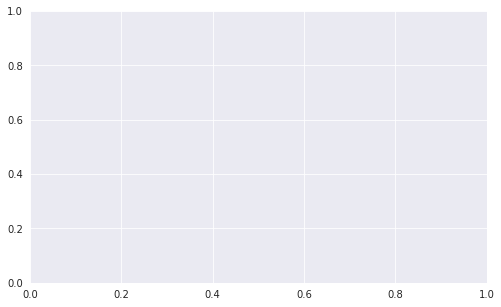

In [ ]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(store_learning.history['loss'], 
         label='Значение ошибки на обучающем наборе')
plt.plot(store_learning.history['val_loss'], 
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2) 
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(store_learning.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(store_learning.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.00001), 
              metrics=['accuracy'])

In [ ]:
epochs = 5 #  количество эпох
path = '/content/NewWhales/' # путь до папок с изображениями

# создаем пустые списки для сбора усредненных данных от шагов в конце эпохи

loss_train_lrn =[]
acc_train_lrn =[]
loss_test_lrn =[]
acc_test_lrn =[]

# определяем количество шагов на 

steps_train = len(set_batches_train[0])
steps_test = len(set_batches_test[0])

for epoch in range(epochs): # запускаем цикл обучения по эпохам
    
    int_start = time.time() #записываем начальное время эпохи
    
    # создаем пустые списки для сбора данных по шагам внутри эпохи
    loss_train = []    
    acc_train = []
    loss_test = []
    acc_test = []

    print(f'Эпоха {epoch+1}/{epochs}') # Выводим текущую эпоху и общее число эпох

    # запускаем цикл обучения по шагам внутри эпохи
    for step in range(steps_train): # получаем батч данных для обучения
        
        Train_step_data = batch_generator(step, path, set_batches_train, img_width, img_height)
        # пропускаем обучающий батч данных, получаем ошибку и точность как список
        result_train_step = model.train_on_batch(Train_step_data[0], Train_step_data[1])
        
        loss_train.append(result_train_step[0]) # собираем ошибку на шаге
        acc_train.append(result_train_step[1]) # собираем точность на шаге

        # Задаем параметры в словаре, которые будем выводить 
        params = {'Время(сек.) на эпохе: ': round(time.time() - int_start,2), #Считаем время обучения на данной эпохе и добавляем в словарь
                  'loss: ': round(result_train_step[0], 4), #добавляем в словарь ошибку на шаге обучения
                  'acc: ': round(result_train_step[1], 4)} #Добавляем точность на шаге обучения

        # печатаем отдельной функцией текущие данные на шаге обучения
        print_log(step, steps_train, params) #Выводим всю нужную информацию 
        # запоминаем последний шаг обучения на эпохе
        # и добавляем единицу для корректности отображения
        endstep = step+1 
    
      
    # собираем усредненные ошибку и точность на обучении от всех шагов на эпохе
    loss_train_lrn.append(np.mean(loss_train))
    acc_train_lrn.append(np.mean(acc_train))

    # запоминаем и округляем последнее записанное усредненное значение для отображения по ходу обучения
    params['loss: '] =  round(loss_train_lrn[-1],4) # перезаписываем в словаре для ошибки на обучении
    params['acc: '] =  round(acc_train_lrn[-1],4) # перезаписываем в словаре для точности на обучении
    
    # оцениваем модели на проверочной базе
    for step in range(steps_test):
        # получаем батч данных для проверки
        Test_step_data = batch_generator(step, path, set_batches_test, img_width, img_height)
        # пропускаем проверочный батч данных через функцию оценки модели,
        # получаем ошибку и точность как список
        result_test_step = model.evaluate(Test_step_data[0], Test_step_data[1], verbose=0)
        # собираем ошибку на шаге
        loss_test.append(result_test_step[0])
        # собираем точность на шаге
        acc_test.append(result_test_step[1])

    # собираем усредненные ошибку и точность на проверке от всех шагов на эпохе
    loss_test_lrn.append(np.mean(loss_test))
    acc_test_lrn.append(np.mean(acc_test))
    
    # запоминаем и округляем последнее записанное значение для отображения по ходу обучения
    test_parm = {'test_loss: ': round(loss_test_lrn[-1],4), # добавляем в словарь  
                'test_acc: ': round(acc_test_lrn[-1],4)} # Добавляем точность в словарь
    # добавляем в обший словарь параметров по эпохе словарь с оценкой модели
    params.update(test_parm)
    # печатаем отдельной функцией усредненные данные в конце текущей эпохи обучения
    print_log(endstep, steps_train, params) #Выводим всю нужную информацию 
        
    # Вручную переносим каретку на следующую строку,
    # чтобы не стирать финальные значения сети на эпохе
    print()

Эпоха 1/5
87/87 [====================]  Время(сек.) на эпохе: 238.36. loss: 0.2162. acc: 0.935. test_loss: 0.3218. test_acc: 0.8661. 
Эпоха 2/5
87/87 [====================]  Время(сек.) на эпохе: 236.78. loss: 0.1674. acc: 0.9443. test_loss: 0.1938. test_acc: 0.9345. 
Эпоха 3/5
87/87 [====================]  Время(сек.) на эпохе: 252.94. loss: 0.1513. acc: 0.9533. test_loss: 0.1126. test_acc: 0.9613. 
Эпоха 4/5
87/87 [====================]  Время(сек.) на эпохе: 246.59. loss: 0.1337. acc: 0.9519. test_loss: 0.1278. test_acc: 0.9568. 
Эпоха 5/5
87/87 [====================]  Время(сек.) на эпохе: 246.54. loss: 0.1315. acc: 0.963. test_loss: 0.1145. test_acc: 0.9628. 


In [ ]:
model.save('model.h5')

In [ ]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(store_learning.history['loss'], 
         label='Значение ошибки на обучающем наборе')
plt.plot(store_learning.history['val_loss'], 
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2) 
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(store_learning.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(store_learning.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

## подготовка датасета

## **модель**

In [ ]:
data_dir = '/content/Whale ReId 2_mm'  # Присваиваем путь к базе в переменную data_dir
#data_dir = '/content/NewWhales'  # Присваиваем путь к базе в переменную data_dir
batch_size = 32             # Определяем batch size
image_size = (224, 224)     # Определяем размер изображений

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,                  # Путь к изображениям
  validation_split = 0.4,    # Устанавливаем разделение на обучающую и проверочную выборки (20%)
  subset = "training",       # Помечаем, что выборка обучающая (80%)
  seed = 123,                # Дополнительное случайное начальное число для перетасовки и преобразований
  image_size = image_size,   # Размер изображений, который был задан ранее
  batch_size = batch_size)   # Размер батча, который был задан ранее

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,                  # Путь к изображениям
  validation_split = 0.4,    # Устанавливаем разделение на обучающую и проверочную выборки (20%)
  subset = "validation",     # Помечаем, что выборка проверочная (20%)
  seed = 123,                # Дополнительное случайное начальное число для перетасовки и преобразований
  image_size = image_size,   # Размер изображений, который был задан ранее
  batch_size = batch_size)   # Размер батча, который был задан ранее
  
                             # Определяем имена классов:
class_names = train_ds.class_names
print(class_names)

Found 4798 files belonging to 102 classes.
Using 2879 files for training.
Found 4798 files belonging to 102 classes.
Using 1919 files for validation.
['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [ ]:
                                                           # Предварительная подгрузка датасета для ускорения обучения и стабилизации
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE) # Предварительная обучающая выборка
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)     # Предварительная тестовая выборка

print(train_ds)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
                                                                        # Дополнительная аугментация в виде слоя для модели (для увеличения базы изображений)
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomZoom((-0.05, 0.05)), # Произвольное увеличение и уменьшение на 10%
  tf.keras.layers.experimental.preprocessing.RandomContrast(0.15)])     # Изменение контраста изображений 

In [ ]:
def plot_graph(train_acc, val_acc, train_loss, val_loss):
  '''
  Функция выведет на экран графики точности и ошибки на проверочной и обучающей выборках.
  '''
  sns.set(style='darkgrid', palette='dark') 
  plt.figure(figsize=(16, 10))
  plt.subplot(2, 2, 1)
  plt.title('Точность', fontweight='bold')
  plt.plot(train_acc, label='Точность на обучащей выборке')
  plt.plot(val_acc, label='Точность на проверочной выборке')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()

  plt.subplot(2, 2, 2)
  plt.title('Ошибка', fontweight='bold')
  plt.plot(train_loss, label='Ошибка на обучающей выборке')
  plt.plot(val_loss, label='Ошибка на проверочной выборке')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Ошибка')
  plt.legend()

  plt.show()

## **NASNetMobile**

In [ ]:
preprocess_input = tf.keras.applications.nasnet.preprocess_input # Нормализация данных на вход в соответствии требованиям модели
gc.collect()                                                     # Сборка мусора для освобождения памяти
image_shape = image_size + (3,)                                  # Определяем входную размерность в соответствии требованиям модели
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()  # Задаем слой GlobalAveragePooling2D
prediction_layer = tf.keras.layers.Dense(len(class_names))       # Задаем выходной слой на нужное нам количество классов


                                                                 # Создаем базовую модель NASNetMobile:
base_model = tf.keras.applications.nasnet.NASNetMobile(input_shape=image_shape,
                         include_top=False,                      # Не включаем верхнюю часть модели, чтобы можно было использовать свои входные размерности
                         weights='imagenet')                     # Используем веса уже предобученной модели на базе Imagenet


                                                                 # Собираем полную модель, состоящую из всех наших определенных слоев и базовой модели NASNetMobile:
inputs = tf.keras.Input(shape=(image_shape))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

19993432/19993432 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 global_average_pooling2d (G  (None, 1056)             0     

In [ ]:
base_learning_rate = 0.0001                                                          # Задаем значение шага обучения
epochs = 6                                                                          # Задаем количество эпох

                                                                                     # Компилируем модель:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),  # Оптимизатор Adam c заданным ранее шагом обучения
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Ошибка SparseCategoricalCrossentropy
              metrics=['accuracy'])                                                  # Метрика Accuracy

Epoch 1/6


90/90 [==============================] - 93s 732ms/step - loss: 3.9945 - accuracy: 0.1323 - val_loss: 3.1194 - val_accuracy: 0.3142
Epoch 2/6
90/90 [==============================] - 48s 536ms/step - loss: 2.3214 - accuracy: 0.4627 - val_loss: 1.9837 - val_accuracy: 0.5143
Epoch 3/6
90/90 [==============================] - 49s 542ms/step - loss: 1.3670 - accuracy: 0.6457 - val_loss: 1.1268 - val_accuracy: 0.7170
Epoch 4/6
90/90 [==============================] - 49s 542ms/step - loss: 0.7960 - accuracy: 0.7895 - val_loss: 0.7460 - val_accuracy: 0.7936
Epoch 5/6
90/90 [==============================] - 48s 537ms/step - loss: 0.5314 - accuracy: 0.8562 - val_loss: 0.6128 - val_accuracy: 0.8609
Epoch 6/6
90/90 [==============================] - 49s 542ms/step - loss: 0.3428 - accuracy: 0.9020 - val_loss: 0.6004 - val_accuracy: 0.8395


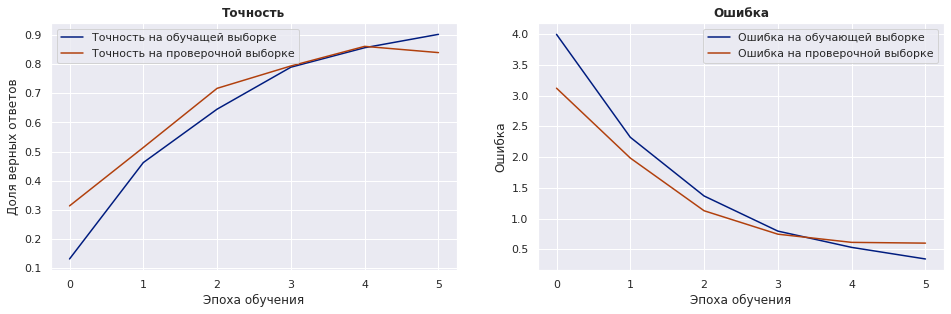

Время обучения: 370 секунд (6.16 минут)


In [ ]:
CurrentTime = time.time()                           # Засекаем время для измерения времени обучения нейронной сети

                                                    # Обучаем модель:
hNASNetMobile = model.fit(train_ds,                 # Обучающая выборка
                          epochs=epochs,            # Количество эпох обучения, заданное ранее
                          validation_data=val_ds)   # Проверочная выборка

                                                    # После того, как пройдет обучение, выведем графики точности и ошибки:
plot_graph(hNASNetMobile.history['accuracy'],
           hNASNetMobile.history['val_accuracy'],
           hNASNetMobile.history['loss'],
           hNASNetMobile.history['val_loss'])

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

In [ ]:
model.save('/content/hNASNetMobile.h5')

In [ ]:
idx_error = 1  # устанавливаем значение счетчика                                                               # Индекс ошибочного изображения 

for sample in val_ds: # перебираем пары изображение - метка
  
  # делаем предсказание
  pred = model.predict(sample[0]) 
  y_pred = np.argmax(pred, axis=-1)

  # меняем формат данных
  y_true = np.array(sample[1])

  # получаем индексы неверно распознанных изображений
  different = np.nonzero(~(y_pred == y_true))
  
  # выводим на печать найденные изображения 
  for d in different[0]:
    print(f'Ошибка {idx_error}:')
    plt.imshow(sample[0][d]/255)
    plt.axis('off')
    plt.show()
    print('Правильный ответ: ', class_names[y_true[d]])
    print('Предсказание модели: ')
    
    # выводим на печать прогнозы сети по этим изображениям
    for c in range(len(class_names)):
      print(f'{class_names[c].rjust(15)}: {round(100*pred[d][c],2)}%' )
    idx_error += 1
    
    print()
    print()
    print()

## **ResNet50**

In [ ]:
preprocess_input = tf.keras.applications.resnet50.preprocess_input  # Нормализация данных на вход в соответствии требованиям модели
gc.collect()                                                        # Сборка мусора для освобождения памяти
image_shape = image_size + (3,)                                     # Определяем входную размерность в соответствии требованиям модели
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()     # Задаем слой GlobalAveragePooling2D
prediction_layer = tf.keras.layers.Dense(len(class_names))          # Задаем выходной слой на нужное нам количество классов


                                                                    # Создаем базовую модель ResNet50:
base_model = tf.keras.applications.resnet50.ResNet50(input_shape=image_shape,
                         include_top=False,                         # Не включаем верхнюю часть модели, чтобы можно было использовать свои входные размерности
                         weights='imagenet')                        # Используем веса уже предобученной модели на базе Imagenet


                                                                    # Собираем полную модель, состоящую из всех наших определенных слоев и базовой модели ResNet50:
inputs = tf.keras.Input(shape=(image_shape))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001                                                          # Задаем значение шага обучения
epochs = 20                                                                          # Задаем количество эпох

                                                                                     # Компилируем модель:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),  # Оптимизатор Adam c заданным ранее шагом обучения
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Ошибка SparseCategoricalCrossentropy
              metrics=['accuracy'])                                                  # Метрика Accuracy

Epoch 1/20


90/90 [==============================] - 65s 637ms/step - loss: 3.3508 - accuracy: 0.2560 - val_loss: 1.8120 - val_accuracy: 0.5784
Epoch 2/20
90/90 [==============================] - 44s 492ms/step - loss: 1.2785 - accuracy: 0.6822 - val_loss: 0.7802 - val_accuracy: 0.7895
Epoch 3/20
90/90 [==============================] - 46s 513ms/step - loss: 0.6451 - accuracy: 0.8166 - val_loss: 0.6943 - val_accuracy: 0.8150
Epoch 4/20
90/90 [==============================] - 46s 510ms/step - loss: 0.3442 - accuracy: 0.9069 - val_loss: 0.4172 - val_accuracy: 0.8833
Epoch 5/20
90/90 [==============================] - 45s 500ms/step - loss: 0.1943 - accuracy: 0.9462 - val_loss: 0.2837 - val_accuracy: 0.9224
Epoch 6/20
90/90 [==============================] - 45s 503ms/step - loss: 0.1553 - accuracy: 0.9573 - val_loss: 0.2688 - val_accuracy: 0.9234
Epoch 7/20
90/90 [==============================] - 46s 509ms/step - loss: 0.1412 - accuracy: 0.9552 - val_loss: 0.3627 - val_accuracy: 0.9057
Epoch 8/20

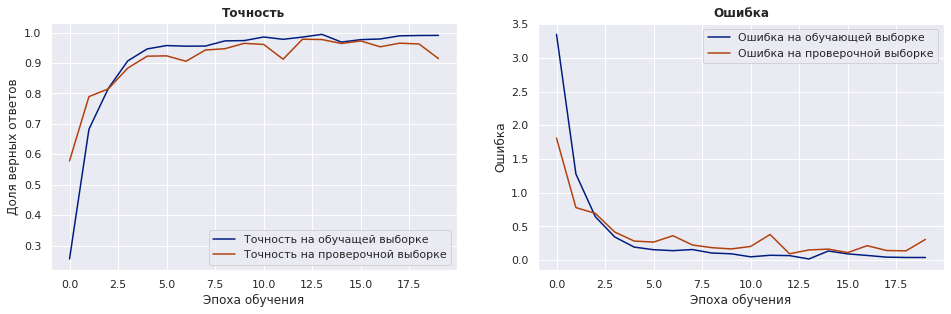

Время обучения: 1169 секунд (19.49 минут)


In [ ]:
CurrentTime = time.time()                       # Засекаем время для измерения времени обучения нейронной сети

                                                # Обучаем модель:
hResNet50 = model.fit(train_ds,                 # Обучающая выборка
                      epochs=epochs,            # Количество эпох обучения, заданное ранее
                      validation_data=val_ds)   # Проверочная выборка

                                                # После того, как пройдет обучение, выведем графики точности и ошибки:
plot_graph(hResNet50.history['accuracy'],
           hResNet50.history['val_accuracy'],
           hResNet50.history['loss'],
           hResNet50.history['val_loss'])

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

In [ ]:
model.save('/content/hResNet50.h5')

In [ ]:
idx_error = 1  # устанавливаем значение счетчика                                                               # Индекс ошибочного изображения 

for sample in val_ds: # перебираем пары изображение - метка
  
  # делаем предсказание
  pred = model.predict(sample[0]) 
  y_pred = np.argmax(pred, axis=-1)

  # меняем формат данных
  y_true = np.array(sample[1])

  # получаем индексы неверно распознанных изображений
  different = np.nonzero(~(y_pred == y_true))
  
  # выводим на печать найденные изображения 
  for d in different[0]:
    print(f'Ошибка {idx_error}:')
    plt.imshow(sample[0][d]/255)
    plt.axis('off')
    plt.show()
    print('Правильный ответ: ', class_names[y_true[d]])
    print('Предсказание модели: ')
    
    # выводим на печать прогнозы сети по этим изображениям
    for c in range(len(class_names)):
      print(f'{class_names[c].rjust(15)}: {round(100*pred[d][c],2)}%' )
    idx_error += 1
    
    print()
    print()
    print()

## **ResNet50V2**

In [ ]:
preprocess_input = tf.keras.applications.resnet_v2.preprocess_input  # Нормализация данных на вход в соответствии требованиям модели
gc.collect()                                                         # Сборка мусора для освобождения памяти
image_shape = image_size + (3,)                                      # Определяем входную размерность в соответствии требованиям модели
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()      # Задаем слой GlobalAveragePooling2D
prediction_layer = tf.keras.layers.Dense(len(class_names))           # Задаем выходной слой на нужное нам количество классов


                                                                     # Создаем базовую модель ResNet50V2:
base_model = tf.keras.applications.resnet_v2.ResNet50V2(input_shape=image_shape,
                         include_top=False,                          # Не включаем верхнюю часть модели, чтобы можно было использовать свои входные размерности
                         weights='imagenet')                         # Используем веса уже предобученной модели на базе Imagenet


                                                                     # Собираем полную модель, состоящую из всех наших определенных слоев и базовой модели ResNet50V2:
inputs = tf.keras.Input(shape=(image_shape))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

94668760/94668760 [==============================] - 5s 0us/step


In [ ]:
base_learning_rate = 0.0001                                                          # Задаем значение шага обучения
epochs = 10                                                                          # Задаем количество эпох

                                                                                     # Компилируем модель:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),  # Оптимизатор Adam c заданным ранее шагом обучения
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Ошибка SparseCategoricalCrossentropy
              metrics=['accuracy'])                                                  # Метрика Accuracy

In [ ]:
CurrentTime = time.time()                         # Засекаем время для измерения времени обучения нейронной сети

                                                  # Обучаем модель:
hResNet50V2 = model.fit(train_ds,                 # Обучающая выборка
                        epochs=epochs,            # Количество эпох обучения, заданное ранее
                        validation_data=val_ds)   # Проверочная выборка

                                                  # После того, как пройдет обучение, выведем графики точности и ошибки:
plot_graph(hResNet50V2.history['accuracy'],
           hResNet50V2.history['val_accuracy'],
           hResNet50V2.history['loss'],
           hResNet50V2.history['val_loss'])

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

#model.save_weights('/content/gdrive/MyDrive/ResNet50V2.h5')

In [ ]:
model.save('/content/hResNet50V2.h5')

In [ ]:
idx_error = 1  # устанавливаем значение счетчика                                                               # Индекс ошибочного изображения 

for sample in val_ds: # перебираем пары изображение - метка
  
  # делаем предсказание
  pred = model.predict(sample[0]) 
  y_pred = np.argmax(pred, axis=-1)

  # меняем формат данных
  y_true = np.array(sample[1])

  # получаем индексы неверно распознанных изображений
  different = np.nonzero(~(y_pred == y_true))
  
  # выводим на печать найденные изображения 
  for d in different[0]:
    print(f'Ошибка {idx_error}:')
    plt.imshow(sample[0][d]/255)
    plt.axis('off')
    plt.show()
    print('Правильный ответ: ', class_names[y_true[d]])
    print('Предсказание модели: ')
    
    # выводим на печать прогнозы сети по этим изображениям
    for c in range(len(class_names)):
      print(f'{class_names[c].rjust(15)}: {round(100*pred[d][c],2)}%' )
    idx_error += 1
    
    print()
    print()
    print()



## **VGG16**
```



In [ ]:
preprocess_input = tf.keras.applications.vgg16.preprocess_input      # Нормализация данных на вход в соответствии требованиям модели
gc.collect()                                                         # Сборка мусора для освобождения памяти
image_shape = image_size + (3,)                                      # Определяем входную размерность в соответствии требованиям модели
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()      # Задаем слой GlobalAveragePooling2D
prediction_layer = tf.keras.layers.Dense(len(class_names))           # Задаем выходной слой на нужное нам количество классов


                                                                     # Создаем базовую модель VGG16:
base_model = tf.keras.applications.vgg16.VGG16(input_shape=image_shape,
                         include_top=False,                          # Не включаем верхнюю часть модели, чтобы можно было использовать свои входные размерности
                         weights='imagenet')                         # Используем веса уже предобученной модели на базе Imagenet


                                                                     # Собираем полную модель, состоящую из всех наших определенных слоев и базовой модели VGG16:
inputs = tf.keras.Input(shape=(image_shape))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

NameError: ignored

In [ ]:
base_learning_rate = 0.0001                                                          # Задаем значение шага обучения
epochs = 10                                                                          # Задаем количество эпох

                                                                                     # Компилируем модель:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),  # Оптимизатор Adam c заданным ранее шагом обучения
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Ошибка SparseCategoricalCrossentropy
              metrics=['accuracy'])                                                  # Метрика Accuracy

In [ ]:
CurrentTime = time.time()                    # Засекаем время для измерения времени обучения нейронной сети

                                             # Обучаем модель:
hVGG16 = model.fit(train_ds,                 # Обучающая выборка
                   epochs=epochs,            # Количество эпох обучения, заданное ранее
                   validation_data=val_ds)   # Проверочная выборка

                                             # После того, как пройдет обучение, выведем графики точности и ошибки:
plot_graph(hVGG16.history['accuracy'],
           hVGG16.history['val_accuracy'],
           hVGG16.history['loss'],
           hVGG16.history['val_loss'])

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

In [ ]:
model.save('/content/hVGG16.h5')

In [ ]:
idx_error = 1  # устанавливаем значение счетчика                                                               # Индекс ошибочного изображения 

for sample in val_ds: # перебираем пары изображение - метка
  
  # делаем предсказание
  pred = model.predict(sample[0]) 
  y_pred = np.argmax(pred, axis=-1)

  # меняем формат данных
  y_true = np.array(sample[1])

  # получаем индексы неверно распознанных изображений
  different = np.nonzero(~(y_pred == y_true))
  
  # выводим на печать найденные изображения 
  for d in different[0]:
    print(f'Ошибка {idx_error}:')
    plt.imshow(sample[0][d]/255)
    plt.axis('off')
    plt.show()
    print('Правильный ответ: ', class_names[y_true[d]])
    print('Предсказание модели: ')
    
    # выводим на печать прогнозы сети по этим изображениям
    for c in range(len(class_names)):
      print(f'{class_names[c].rjust(15)}: {round(100*pred[d][c],2)}%' )
    idx_error += 1
    
    print()
    print()
    print()

## **VGG 19**

In [ ]:
preprocess_input = tf.keras.applications.vgg19.preprocess_input      # Нормализация данных на вход в соответствии требованиям модели
gc.collect()                                                         # Сборка мусора для освобождения памяти
image_shape = image_size + (3,)                                      # Определяем входную размерность в соответствии требованиям модели
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()      # Задаем слой GlobalAveragePooling2D
prediction_layer = tf.keras.layers.Dense(len(class_names))           # Задаем выходной слой на нужное нам количество классов


                                                                     # Создаем базовую модель VGG 19:
base_model = tf.keras.applications.vgg19.VGG19(input_shape=image_shape,
                         include_top=False,                          # Не включаем верхнюю часть модели, чтобы можно было использовать свои входные размерности
                         weights='imagenet')                         # Используем веса уже предобученной модели на базе Imagenet


                                                                     # Собираем полную модель, состоящую из всех наших определенных слоев и базовой модели VGG 19:
inputs = tf.keras.Input(shape=(image_shape))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001                                                          # Задаем значение шага обучения
epochs = 6                                                                          # Задаем количество эпох

                                                                                     # Компилируем модель:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),  # Оптимизатор Adam c заданным ранее шагом обучения
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Ошибка SparseCategoricalCrossentropy
              metrics=['accuracy'])                                                  # Метрика Accuracy

In [ ]:
CurrentTime = time.time()                    # Засекаем время для измерения времени обучения нейронной сети

                                             # Обучаем модель:
hVGG19 = model.fit(train_ds,                 # Обучающая выборка
                   epochs=epochs,            # Количество эпох обучения, заданное ранее
                   validation_data=val_ds)   # Проверочная выборка

                                             # После того, как пройдет обучение, выведем графики точности и ошибки:
plot_graph(hVGG19.history['accuracy'],
           hVGG19.history['val_accuracy'],
           hVGG19.history['loss'],
           hVGG19.history['val_loss'])

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

#model.save_weights('/content/gdrive/MyDrive/VGG19.h5')

In [ ]:
model.save('/content/hVGG19.h5')

In [ ]:
idx_error = 1  # устанавливаем значение счетчика                                                               # Индекс ошибочного изображения 

for sample in val_ds: # перебираем пары изображение - метка
  
  # делаем предсказание
  pred = model.predict(sample[0]) 
  y_pred = np.argmax(pred, axis=-1)

  # меняем формат данных
  y_true = np.array(sample[1])

  # получаем индексы неверно распознанных изображений
  different = np.nonzero(~(y_pred == y_true))
  
  # выводим на печать найденные изображения 
  for d in different[0]:
    print(f'Ошибка {idx_error}:')
    plt.imshow(sample[0][d]/255)
    plt.axis('off')
    plt.show()
    print('Правильный ответ: ', class_names[y_true[d]])
    print('Предсказание модели: ')
    
    # выводим на печать прогнозы сети по этим изображениям
    for c in range(len(class_names)):
      print(f'{class_names[c].rjust(15)}: {round(100*pred[d][c],2)}%' )
    idx_error += 1
    
    print()
    print()
    print()

## **Xception**

In [ ]:
data_dir = '/content/Whale ReId 2_mm/'   # Присваиваем путь к базе в переменную data_dir
batch_size = 32              # Определяем batch size
image_size = (299, 299)      # Определяем размер изображений

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,                  # Путь к изображениям
  validation_split = 0.2,    # Устанавливаем разделение на обучающую и проверочную выборки (20%)
  subset = "training",       # Помечаем, что выборка обучающая (80%)
  seed = 123,                # Дополнительное случайное начальное число для перетасовки и преобразований
  image_size = image_size,   # Размер изображений, который был задан ранее
  batch_size = batch_size)   # Размер батча, который был задан ранее

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,                                                             # Путь к изображениям
  validation_split = 0.2,                                               # Устанавливаем разделение на обучающую и проверочную выборки (20%)
  subset = "validation",                                                # Помечаем, что выборка проверочная (20%)
  seed = 123,                                                           # Дополнительное случайное начальное число для перетасовки и преобразований
  image_size = image_size,                                              # Размер изображений, который был задан ранее
  batch_size = batch_size)                                              # Размер батча, который был задан ранее

                                                                        # Определяем имена классов:
class_names = train_ds.class_names
print(class_names)

                                                                        # Предварительная подгрузка датасета для ускорения обучения и стабилизации
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)              # Предварительная обучающая выборка
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)                  # Предварительная тестовая выборка
print(train_ds)

                                                                        # Дополнительная аугментация в виде слоя для модели (для увеличения базы изображений)
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomZoom((-0.05, 0.05)), # Произвольное увеличение и уменьшение на 10%
  tf.keras.layers.experimental.preprocessing.RandomContrast(0.15)])     # Изменение контраста изображений 

Found 4798 files belonging to 102 classes.
Using 3839 files for training.
Found 4798 files belonging to 102 classes.
Using 959 files for validation.
['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
gc.collect()                                                       # Сборка мусора для освобождения памяти
preprocess_input = tf.keras.applications.xception.preprocess_input # Нормализация данных на вход в соответствии требованиям модели
image_shape = image_size + (3,)                                    # Определяем входную размерность в соответствии требованиям модели
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()    # Задаем слой GlobalAveragePooling2D
prediction_layer = tf.keras.layers.Dense(len(class_names))         # Задаем выходной слой на нужное нам количество классов


                                                                    # Создаем базовую модель Xception:
base_model = tf.keras.applications.xception.Xception(input_shape=image_shape,
                         include_top=False,                         # Не включаем верхнюю часть модели, чтобы можно было использовать свои входные размерности
                         weights='imagenet')                        # Используем веса уже предобученной модели на базе Imagenet


                                                                    # Собираем полную модель, состоящую из всех наших определенных слоев и базовой модели Xception:
inputs = tf.keras.Input(shape=(image_shape))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

83683744/83683744 [==============================] - 6s 0us/step


In [ ]:
base_learning_rate = 0.0001                                                          # Задаем значение шага обучения
epochs = 10                                                                          # Задаем количество эпох

                                                                                     # Компилируем модель:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),  # Оптимизатор Adam c заданным ранее шагом обучения
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Ошибка SparseCategoricalCrossentropy
              metrics=['accuracy'])                                                  # Метрика Accuracy

Epoch 1/10


120/120 [==============================] - 193s 2s/step - loss: 2.6043 - accuracy: 0.4165 - val_loss: 0.9522 - val_accuracy: 0.7560
Epoch 2/10
120/120 [==============================] - 169s 1s/step - loss: 0.5577 - accuracy: 0.8463 - val_loss: 0.2244 - val_accuracy: 0.9406
Epoch 3/10
120/120 [==============================] - 167s 1s/step - loss: 0.1578 - accuracy: 0.9557 - val_loss: 0.1509 - val_accuracy: 0.9635
Epoch 4/10
120/120 [==============================] - 167s 1s/step - loss: 0.0883 - accuracy: 0.9724 - val_loss: 0.1929 - val_accuracy: 0.9479
Epoch 5/10
120/120 [==============================] - 167s 1s/step - loss: 0.0525 - accuracy: 0.9833 - val_loss: 0.1326 - val_accuracy: 0.9677
Epoch 6/10
120/120 [==============================] - 167s 1s/step - loss: 0.0193 - accuracy: 0.9935 - val_loss: 0.1202 - val_accuracy: 0.9677
Epoch 7/10
120/120 [==============================] - 166s 1s/step - loss: 0.0640 - accuracy: 0.9844 - val_loss: 0.2054 - val_accuracy: 0.9604
Epoch 8/10

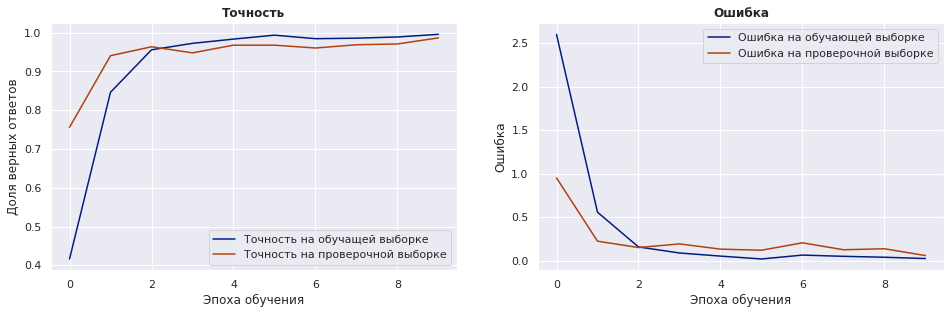

Время обучения: 1769 секунд (29.49 минут)


In [ ]:
CurrentTime = time.time()                       # Засекаем время для измерения времени обучения нейронной сети

                                                # Обучаем модель:
hXception = model.fit(train_ds,                 # Обучающая выборка
                      epochs=epochs,            # Количество эпох обучения, заданное ранее
                      validation_data=val_ds)   # Проверочная выборка

                                                # После того, как пройдет обучение, выведем графики точности и ошибки:
plot_graph(hXception.history['accuracy'],
           hXception.history['val_accuracy'],
           hXception.history['loss'],
           hXception.history['val_loss'])

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

In [ ]:
model.save('/content/hXception.h5')

1/1 [==============================] - 0s 45ms/step
Ошибка 1:


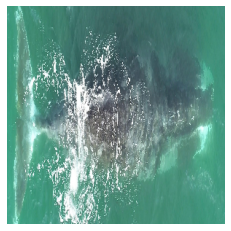

Правильный ответ:  29
Предсказание модели: 
              1: 332.65%
             10: -1489.87%
            100: -326.29%
            101: 210.13%
            102: -923.47%
             11: 1138.55%
             12: -1310.44%
             13: -736.58%
             14: -1106.96%
             15: -785.69%
             16: -96.04%
             17: -426.85%
             18: -966.89%
             19: -799.39%
              2: -397.47%
             20: -909.41%
             21: -1034.29%
             22: -302.9%
             23: -1739.18%
             24: -1014.36%
             25: -939.18%
             26: -980.22%
             27: -1300.04%
             28: 16.94%
             29: 1048.92%
              3: -1682.9%
             30: -451.02%
             31: -1127.89%
             32: -866.52%
             33: -1284.28%
             34: -1226.46%
             35: -270.09%
             36: -391.82%
             37: -1599.8%
             38: -903.32%
             39: -527.49%
              4:

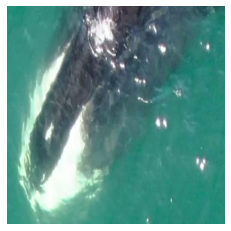

Правильный ответ:  66
Предсказание модели: 
              1: 261.59%
             10: -844.4%
            100: -564.56%
            101: -196.24%
            102: -879.01%
             11: 24.3%
             12: -622.3%
             13: -891.01%
             14: -1204.72%
             15: -1108.71%
             16: -205.2%
             17: -834.57%
             18: -736.35%
             19: -1122.92%
              2: 416.4%
             20: -856.34%
             21: -710.44%
             22: -241.16%
             23: -1241.9%
             24: -848.61%
             25: -979.65%
             26: -707.74%
             27: -1279.93%
             28: 139.99%
             29: -474.8%
              3: -1004.97%
             30: -146.62%
             31: -748.9%
             32: -680.99%
             33: -171.67%
             34: -831.12%
             35: -263.98%
             36: -678.4%
             37: -1121.16%
             38: -520.86%
             39: -518.8%
              4: -1088.78%
 

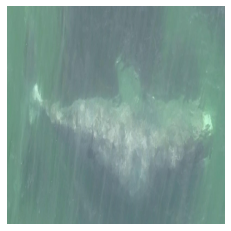

Правильный ответ:  46
Предсказание модели: 
              1: -439.36%
             10: -736.04%
            100: -666.32%
            101: -891.46%
            102: -1026.86%
             11: -452.65%
             12: -595.1%
             13: 547.36%
             14: -909.83%
             15: 124.42%
             16: -347.72%
             17: -957.72%
             18: 460.84%
             19: -565.98%
              2: -911.45%
             20: -537.59%
             21: -442.81%
             22: 519.36%
             23: -1026.11%
             24: -1205.48%
             25: -525.08%
             26: -906.42%
             27: -1216.36%
             28: 84.28%
             29: -476.8%
              3: -922.98%
             30: -431.04%
             31: -850.28%
             32: -388.39%
             33: -126.61%
             34: -1493.5%
             35: -228.56%
             36: 649.71%
             37: -1088.53%
             38: 179.78%
             39: 33.36%
              4: -429.62%
 

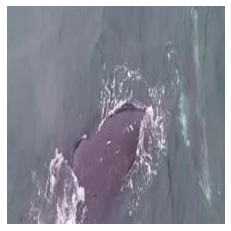

Правильный ответ:  29
Предсказание модели: 
              1: -579.57%
             10: -840.61%
            100: -820.56%
            101: -556.47%
            102: -360.71%
             11: -706.95%
             12: -802.62%
             13: -901.0%
             14: -1043.59%
             15: -1008.51%
             16: -884.57%
             17: -569.54%
             18: -786.48%
             19: -909.92%
              2: 16.1%
             20: -549.77%
             21: -369.15%
             22: -842.97%
             23: -566.85%
             24: -527.46%
             25: -541.98%
             26: -894.43%
             27: 75.17%
             28: -704.08%
             29: 666.26%
              3: -227.79%
             30: -253.55%
             31: 898.71%
             32: -588.4%
             33: -765.73%
             34: -525.49%
             35: -681.23%
             36: -1027.2%
             37: -1024.84%
             38: -1254.52%
             39: -1002.99%
              4: -858.23

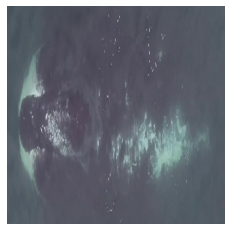

Правильный ответ:  95
Предсказание модели: 
              1: -197.65%
             10: -1742.35%
            100: -694.1%
            101: -274.37%
            102: -642.78%
             11: -548.01%
             12: -1385.6%
             13: -582.44%
             14: -1267.92%
             15: -1671.35%
             16: -399.04%
             17: -619.39%
             18: -581.23%
             19: -1442.74%
              2: -653.24%
             20: -1092.07%
             21: -488.88%
             22: -156.92%
             23: -1052.58%
             24: -1102.04%
             25: -1237.71%
             26: -1250.22%
             27: -534.82%
             28: -378.63%
             29: -837.83%
              3: -1248.44%
             30: 51.45%
             31: -666.12%
             32: -558.28%
             33: -1299.41%
             34: -976.98%
             35: -605.79%
             36: -1295.68%
             37: -997.12%
             38: -683.94%
             39: 303.7%
             

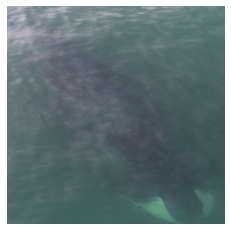

Правильный ответ:  39
Предсказание модели: 
              1: -161.63%
             10: -946.72%
            100: -594.3%
            101: -993.11%
            102: -721.95%
             11: -174.11%
             12: -602.35%
             13: -547.58%
             14: -967.86%
             15: -742.59%
             16: 171.54%
             17: -189.45%
             18: -702.31%
             19: -911.45%
              2: -173.85%
             20: -888.33%
             21: -562.39%
             22: -70.27%
             23: -738.44%
             24: -667.63%
             25: -606.03%
             26: -510.0%
             27: -981.89%
             28: 122.27%
             29: -581.35%
              3: -1084.2%
             30: -376.26%
             31: -775.59%
             32: -556.7%
             33: -471.19%
             34: -596.03%
             35: -813.45%
             36: -354.39%
             37: -977.57%
             38: -289.96%
             39: 163.99%
              4: -373.79%
 

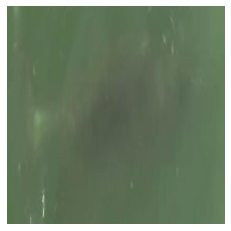

Правильный ответ:  83
Предсказание модели: 
              1: -769.7%
             10: -110.13%
            100: -898.29%
            101: -1042.99%
            102: -899.36%
             11: -1372.81%
             12: -839.83%
             13: -812.73%
             14: -100.16%
             15: -398.78%
             16: -543.43%
             17: -588.45%
             18: -813.45%
             19: -778.5%
              2: -456.12%
             20: -136.53%
             21: -626.35%
             22: -189.72%
             23: -850.22%
             24: -555.45%
             25: -395.05%
             26: -759.12%
             27: -324.69%
             28: -745.08%
             29: -475.49%
              3: -678.22%
             30: -1154.27%
             31: -550.25%
             32: -699.16%
             33: -499.5%
             34: -506.82%
             35: -142.44%
             36: -859.35%
             37: -508.58%
             38: -486.43%
             39: -604.91%
              4: -32

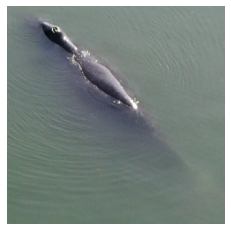

Правильный ответ:  14
Предсказание модели: 
              1: -991.31%
             10: -607.84%
            100: -464.08%
            101: -861.71%
            102: -1263.84%
             11: -662.41%
             12: -473.15%
             13: -548.79%
             14: -98.73%
             15: -710.99%
             16: -206.56%
             17: -753.79%
             18: -560.63%
             19: -574.19%
              2: -712.78%
             20: -315.47%
             21: -1026.67%
             22: -581.57%
             23: -646.19%
             24: -746.69%
             25: -845.82%
             26: -535.12%
             27: -175.82%
             28: -516.54%
             29: -1118.89%
              3: -497.82%
             30: -793.15%
             31: -1091.31%
             32: -461.27%
             33: -775.15%
             34: -525.78%
             35: -429.33%
             36: -727.87%
             37: -559.61%
             38: -626.29%
             39: -252.85%
              4: 

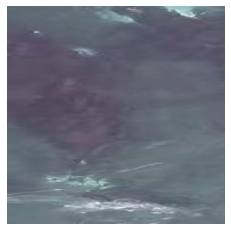

Правильный ответ:  66
Предсказание модели: 
              1: -570.66%
             10: -523.04%
            100: -762.87%
            101: -1000.27%
            102: -1173.12%
             11: -294.79%
             12: -469.67%
             13: -622.45%
             14: -1038.65%
             15: -1438.84%
             16: -369.22%
             17: -138.58%
             18: -1079.26%
             19: -1244.72%
              2: 242.62%
             20: -649.71%
             21: -917.71%
             22: -272.61%
             23: -611.83%
             24: -912.15%
             25: -564.43%
             26: 1.77%
             27: -641.13%
             28: -415.77%
             29: -698.02%
              3: -1.43%
             30: -563.03%
             31: -222.6%
             32: -621.51%
             33: -166.54%
             34: 237.18%
             35: -297.31%
             36: -546.27%
             37: -835.09%
             38: -497.68%
             39: -910.81%
              4: -803.

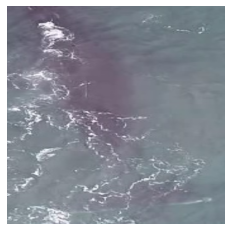

Правильный ответ:  72
Предсказание модели: 
              1: -779.09%
             10: -946.95%
            100: -529.0%
            101: -1341.16%
            102: -924.45%
             11: -342.11%
             12: -466.25%
             13: -666.01%
             14: -880.23%
             15: -1311.48%
             16: -664.18%
             17: -149.58%
             18: -1236.41%
             19: -1404.96%
              2: 36.96%
             20: -286.09%
             21: -509.8%
             22: -665.57%
             23: -784.7%
             24: -917.31%
             25: -803.87%
             26: -641.09%
             27: -386.73%
             28: -605.44%
             29: -268.55%
              3: 212.05%
             30: -119.56%
             31: -111.2%
             32: -898.39%
             33: -600.29%
             34: 928.2%
             35: -604.22%
             36: -604.47%
             37: -928.12%
             38: -1103.04%
             39: -895.29%
              4: -678.58

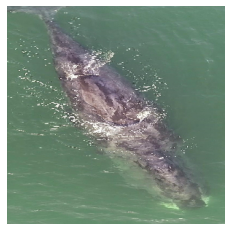

Правильный ответ:  9
Предсказание модели: 
              1: -631.7%
             10: -585.86%
            100: -571.23%
            101: -1133.15%
            102: -560.34%
             11: 244.75%
             12: -399.35%
             13: -657.88%
             14: -1005.52%
             15: -810.08%
             16: -60.82%
             17: -739.83%
             18: -880.34%
             19: -917.0%
              2: -517.17%
             20: -727.76%
             21: -596.44%
             22: -244.57%
             23: -1039.15%
             24: -1572.79%
             25: -762.69%
             26: -45.11%
             27: -431.67%
             28: -263.52%
             29: -634.05%
              3: 9.07%
             30: -869.17%
             31: -1167.22%
             32: -754.88%
             33: -215.63%
             34: -371.31%
             35: -524.88%
             36: -243.45%
             37: -507.74%
             38: -1070.94%
             39: -194.57%
              4: 497.89

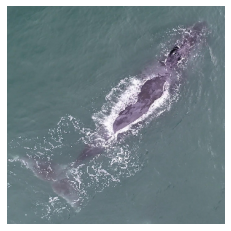

Правильный ответ:  53
Предсказание модели: 
              1: -874.1%
             10: -775.61%
            100: 109.48%
            101: -813.24%
            102: -601.96%
             11: 472.67%
             12: -441.84%
             13: -346.41%
             14: -599.06%
             15: -698.21%
             16: -176.81%
             17: -172.95%
             18: -387.17%
             19: -674.76%
              2: -425.88%
             20: -618.41%
             21: -659.32%
             22: -355.61%
             23: -506.43%
             24: -485.79%
             25: -187.92%
             26: -435.2%
             27: -189.08%
             28: -93.45%
             29: -51.87%
              3: -620.59%
             30: -324.27%
             31: -764.84%
             32: -629.9%
             33: -85.43%
             34: -524.73%
             35: -336.9%
             36: -210.87%
             37: -670.2%
             38: -868.92%
             39: -233.11%
              4: -667.49%
    

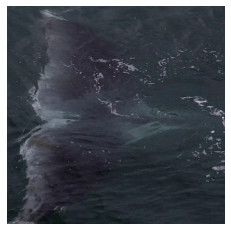

Правильный ответ:  18
Предсказание модели: 
              1: -514.33%
             10: -1371.07%
            100: -6.57%
            101: -671.19%
            102: -229.14%
             11: 207.94%
             12: -722.22%
             13: -558.1%
             14: -637.1%
             15: -1147.86%
             16: -377.27%
             17: 220.47%
             18: -372.96%
             19: -1617.59%
              2: -370.36%
             20: -933.64%
             21: -1112.7%
             22: -138.14%
             23: -540.73%
             24: -968.53%
             25: -238.12%
             26: -388.1%
             27: -639.62%
             28: -382.72%
             29: -968.46%
              3: -391.58%
             30: -617.12%
             31: 6.05%
             32: -919.37%
             33: -509.49%
             34: -470.63%
             35: -728.59%
             36: -732.52%
             37: -880.68%
             38: -976.28%
             39: -352.5%
              4: -616.7%
   

In [ ]:
idx_error = 1  # устанавливаем значение счетчика                                                               # Индекс ошибочного изображения 

for sample in val_ds: # перебираем пары изображение - метка
  
  # делаем предсказание
  pred = model.predict(sample[0]) 
  y_pred = np.argmax(pred, axis=-1)

  # меняем формат данных
  y_true = np.array(sample[1])

  # получаем индексы неверно распознанных изображений
  different = np.nonzero(~(y_pred == y_true))
  
  # выводим на печать найденные изображения 
  for d in different[0]:
    print(f'Ошибка {idx_error}:')
    plt.imshow(sample[0][d]/255)
    plt.axis('off')
    plt.show()
    print('Правильный ответ: ', class_names[y_true[d]])
    print('Предсказание модели: ')
    
    # выводим на печать прогнозы сети по этим изображениям
    for c in range(len(class_names)):
      print(f'{class_names[c].rjust(15)}: {round(100*pred[d][c],2)}%' )
    idx_error += 1
    
    print()
    print()
    print()

## **EfficientNet
**

In [ ]:
data_dir = '/content/Whale ReId 2_mm/'   # Присваиваем путь к базе в переменную data_dir
batch_size = 8               # Определяем batch size
image_size = (299, 299)      # Определяем размер изображений

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,                  # Путь к изображениям
  validation_split = 0.2,    # Устанавливаем разделение на обучающую и проверочную выборки (20%)
  subset = "training",       # Помечаем, что выборка обучающая (80%)
  seed = 123,                # Дополнительное случайное начальное число для перетасовки и преобразований
  image_size = image_size,   # Размер изображений, который был задан ранее
  batch_size = batch_size)   # Размер батча, который был задан ранее

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,                                                             # Путь к изображениям
  validation_split = 0.2,                                               # Устанавливаем разделение на обучающую и проверочную выборки (20%)
  subset = "validation",                                                # Помечаем, что выборка проверочная (20%)
  seed = 123,                                                           # Дополнительное случайное начальное число для перетасовки и преобразований
  image_size = image_size,                                              # Размер изображений, который был задан ранее
  batch_size = batch_size)                                              # Размер батча, который был задан ранее

                                                                        # Определяем имена классов:
class_names = train_ds.class_names
print(class_names)

                                                                        # Предварительная подгрузка датасета для ускорения обучения и стабилизации
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)              # Предварительная обучающая выборка
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)                  # Предварительная тестовая выборка
print(train_ds)

                                                                        # Дополнительная аугментация в виде слоя для модели (для увеличения базы изображений)
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomZoom((-0.05, 0.05)), # Произвольное увеличение и уменьшение на 10%
  tf.keras.layers.experimental.preprocessing.RandomContrast(0.15)])     # Изменение контраста изображений 

Found 4798 files belonging to 102 classes.
Using 3839 files for training.
Found 4798 files belonging to 102 classes.
Using 959 files for validation.
['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
gc.collect()                                                            # Сборка мусора для освобождения памяти
preprocess_input = tf.keras.applications.efficientnet.preprocess_input  # Нормализация данных на вход в соответствии требованиям модели
image_shape = image_size + (3,)                                         # Определяем входную размерность в соответствии требованиям модели
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()         # Задаем слой GlobalAveragePooling2D
prediction_layer = tf.keras.layers.Dense(len(class_names))              # Задаем выходной слой на нужное нам количество классов


                                                                        # Создаем базовую модель EfficientNet:
base_model = tf.keras.applications.efficientnet.EfficientNetB7(input_shape=image_shape,
                         include_top=False,                             # Не включаем верхнюю часть модели, чтобы можно было использовать свои входные размерности
                         weights='imagenet')                            # Используем веса уже предобученной модели на базе Imagenet


                                                                        #  Собираем полную модель, состоящую из всех наших определенных слоев и базовой модели EfficientNet:
inputs = tf.keras.Input(shape=(image_shape))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

258076736/258076736 [==============================] - 12s 0us/step


In [ ]:
base_learning_rate = 0.0001                                                          # Задаем значение шага обучения
epochs = 5                                                                           # Задаем количество эпох

                                                                                     # Компилируем модель:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),  # Оптимизатор Adam c заданным ранее шагом обучения
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Ошибка SparseCategoricalCrossentropy
              metrics=['accuracy'])                                                  # Метрика Accuracy

Epoch 1/5


480/480 [==============================] - 560s 1s/step - loss: 1.6773 - accuracy: 0.6327 - val_loss: 0.4706 - val_accuracy: 0.8770
Epoch 2/5
480/480 [==============================] - 503s 1s/step - loss: 0.1598 - accuracy: 0.9601 - val_loss: 0.2268 - val_accuracy: 0.9333
Epoch 3/5
480/480 [==============================] - 505s 1s/step - loss: 0.1087 - accuracy: 0.9716 - val_loss: 0.3167 - val_accuracy: 0.9374
Epoch 4/5
480/480 [==============================] - 505s 1s/step - loss: 0.0527 - accuracy: 0.9875 - val_loss: 0.0612 - val_accuracy: 0.9854
Epoch 5/5
480/480 [==============================] - 503s 1s/step - loss: 0.0931 - accuracy: 0.9786 - val_loss: 0.3675 - val_accuracy: 0.9093


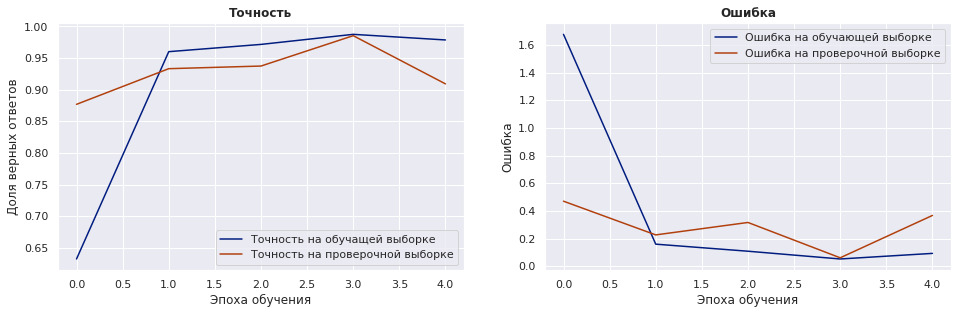

Время обучения: 2692 секунд (44.87 минут)


In [ ]:
CurrentTime = time.time()                           # Засекаем время для измерения времени обучения нейронной сети

                                                    # Обучаем модель:
hEfficientNet = model.fit(train_ds,                 # Обучающая выборка
                          epochs=epochs,            # Количество эпох обучения, заданное ранее
                          validation_data=val_ds)   # Проверочная выборка

                                                    # После того, как пройдет обучение, выведем графики точности и ошибки:
plot_graph(hEfficientNet.history['accuracy'],
           hEfficientNet.history['val_accuracy'],
           hEfficientNet.history['loss'],
           hEfficientNet.history['val_loss'])

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

In [ ]:
model.save('/content/hEfficientNet.h5')

In [ ]:
idx_error = 1  # устанавливаем значение счетчика                                                               # Индекс ошибочного изображения 

for sample in val_ds: # перебираем пары изображение - метка
  
  # делаем предсказание
  pred = model.predict(sample[0]) 
  y_pred = np.argmax(pred, axis=-1)

  # меняем формат данных
  y_true = np.array(sample[1])

  # получаем индексы неверно распознанных изображений
  different = np.nonzero(~(y_pred == y_true))
  
  # выводим на печать найденные изображения 
  for d in different[0]:
    print(f'Ошибка {idx_error}:')
    plt.imshow(sample[0][d]/255)
    plt.axis('off')
    plt.show()
    print('Правильный ответ: ', class_names[y_true[d]])
    print('Предсказание модели: ')
    
    # выводим на печать прогнозы сети по этим изображениям
    for c in range(len(class_names)):
      print(f'{class_names[c].rjust(15)}: {round(100*pred[d][c],2)}%' )
    idx_error += 1
    
    print()
    print()
    print()


## **NASNetLarge**

In [ ]:
gc.collect()                                               # Сборка мусора для освобождения памяти
data_dir = '/content/Whale ReId 2_mm/'                                 # Присваиваем путь к базе в переменную data_dir
batch_size = 4                                             # Определяем batch size
image_size = (331, 331)                                    # Определяем размер изображений

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,                                                # Путь к изображениям
  validation_split = 0.2,                                  # Устанавливаем разделение на обучающую и проверочную выборки (20%)
  subset = "training",                                     # Помечаем, что выборка обучающая (80%)
  seed = 123,                                              # Дополнительное случайное начальное число для перетасовки и преобразований
  image_size = image_size,                                 # Размер изображений, который был задан ранее
  batch_size = batch_size)                                 # Размер батча, который был задан ранее

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,                                                # Путь к изображениям
  validation_split = 0.2,                                  # Устанавливаем разделение на обучающую и проверочную выборки (20%)
  subset = "validation",                                   # Помечаем, что выборка проверочная (20%)
  seed = 123,                                              # Дополнительное случайное начальное число для перетасовки и преобразований
  image_size = image_size,                                 # Размер изображений, который был задан ранее
  batch_size = batch_size)                                 # Размер батча, который был задан ранее

                                                           # Определяем имена классов:
class_names = train_ds.class_names
print(class_names)

                                                           # Предварительная подгрузка датасета для ускорения обучения и стабилизации
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE) # Предварительная обучающая выборка
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)     # Предварительная тестовая выборка
print(train_ds)

Found 4798 files belonging to 102 classes.
Using 3839 files for training.
Found 4798 files belonging to 102 classes.
Using 959 files for validation.
['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 331, 331, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
preprocess_input = tf.keras.applications.nasnet.preprocess_input   # Нормализация данных на вход в соответствии требованиям модели
image_shape = image_size + (3,)                                    # Определяем входную размерность в соответствии требованиям модели
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()    # Задаем слой GlobalAveragePooling2D
prediction_layer = tf.keras.layers.Dense(len(class_names))         # Задаем выходной слой на нужное нам количество классов


                                                                   # Создаем базовую модель NASNetLarge:
base_model = tf.keras.applications.nasnet.NASNetLarge(input_shape=image_shape,
                         include_top=False,                        # Не включаем верхнюю часть модели, чтобы можно было использовать свои входные размерности
                         weights='imagenet')                       # Используем веса уже предобученной модели на базе Imagenet


                                                                   # Собираем полную модель, состоящую из всех наших определенных слоев и базовой модели NASNetLarge:
inputs = tf.keras.Input(shape=(image_shape))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

343610240/343610240 [==============================] - 15s 0us/step


In [ ]:
base_learning_rate = 0.0001                                                          # Задаем значение шага обучения
epochs = 5                                                                           # Задаем количество эпох

                                                                                     # Компилируем модель:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),  # Оптимизатор Adam c заданным ранее шагом обучения
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Ошибка SparseCategoricalCrossentropy
              metrics=['accuracy'])                                                  # Метрика Accuracy

In [ ]:
plot_model(base_model)

In [ ]:
plot_model(model)

Epoch 1/5
960/960 [==============================] - 687s 680ms/step - loss: 3.9844 - accuracy: 0.1042 - val_loss: 3.1433 - val_accuracy: 0.2158
Epoch 2/5
960/960 [==============================] - 643s 670ms/step - loss: 2.4220 - accuracy: 0.3845 - val_loss: 1.5968 - val_accuracy: 0.5766
Epoch 3/5
960/960 [==============================] - 643s 670ms/step - loss: 1.1273 - accuracy: 0.6843 - val_loss: 0.8886 - val_accuracy: 0.7372
Epoch 4/5
960/960 [==============================] - 642s 668ms/step - loss: 0.5999 - accuracy: 0.8231 - val_loss: 0.5995 - val_accuracy: 0.8217
Epoch 5/5
960/960 [==============================] - 642s 669ms/step - loss: 0.3567 - accuracy: 0.8911 - val_loss: 0.6526 - val_accuracy: 0.8238


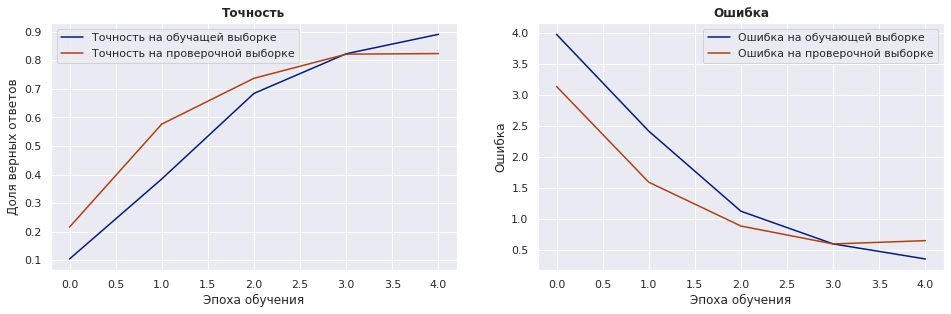

Время обучения: 3375 секунд (56.25 минут)


In [ ]:
CurrentTime = time.time()                          # Засекаем время для измерения времени обучения нейронной сети

                                                   # Обучаем модель:
hNASNetLarge = model.fit(train_ds,                 # Обучающая выборка
                      epochs=epochs,               # Количество эпох обучения, заданное ранее
                      validation_data=val_ds)      # Проверочная выборка

                                                   # После того, как пройдет обучение, выведем графики точности и ошибки:
plot_graph(hNASNetLarge.history['accuracy'],
           hNASNetLarge.history['val_accuracy'],
           hNASNetLarge.history['loss'],
           hNASNetLarge.history['val_loss'])

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))



In [ ]:
model.save('/content/hNASNetLarge.h5')

In [ ]:
idx_error = 1  # устанавливаем значение счетчика                                                               # Индекс ошибочного изображения 

for sample in val_ds: # перебираем пары изображение - метка
  
  # делаем предсказание
  pred = model.predict(sample[0]) 
  y_pred = np.argmax(pred, axis=-1)

  # меняем формат данных
  y_true = np.array(sample[1])

  # получаем индексы неверно распознанных изображений
  different = np.nonzero(~(y_pred == y_true))
  
  # выводим на печать найденные изображения 
  for d in different[0]:
    print(f'Ошибка {idx_error}:')
    plt.imshow(sample[0][d]/255)
    plt.axis('off')
    plt.show()
    print('Правильный ответ: ', class_names[y_true[d]])
    print('Предсказание модели: ')
    
    # выводим на печать прогнозы сети по этим изображениям
    for c in range(len(class_names)):
      print(f'{class_names[c].rjust(15)}: {round(100*pred[d][c],2)}%' )
    idx_error += 1
    
    print()
    print()
    print()

In [ ]:
# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()    

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))
